# IGRAC's Method 30 Years

In [3]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings; warnings.filterwarnings(action='ignore')

In [4]:
# INITIALIZE THE OUTPUT FILE
list_aquifers = []

In [5]:
#Groundwater level time series are in the file WATERLEVEL_demo, read into gdf dataframe
filename = "groundwater_timeseries_data_Negative.csv"
#gdf = pd.DataFrame(pd.read_csv(filename, index_col='date', parse_dates=True, infer_datetime_format=True)) #replace demo file with filename
gdf = pd.DataFrame(pd.read_csv(filename)) #without automatic parsing of dates
gdf['date'] = pd.to_datetime(gdf['date'], format='%Y-%m-%d')
gdf.set_index('date', inplace=True)
#gdf['level']=-gdf['level']*0.3048 # converting depth to elevation and feet to meters
gdf.head()

,level,site
date,,
1985-01-01,-16.92,Site_1
1985-02-01,-15.32,Site_1
1985-03-01,-14.22,Site_1
1985-04-01,-15.39,Site_1
1985-05-01,-17.11,Site_1


There are some cases where borehole names are numbers (as is the case for most boreholes in the US). When they are read into the notebook, they usually have a scientific format. If this happens, sometimes the value is modified. To avoid that, append a   #  symbol in front of each site name in the .csv file.

Now we create a matrix table with one time series per column. We resample this new dataframe to a monthly timescale and create a list of the column names.

In [6]:
#gdf_pivot is new matrix table/dataframe
gdf_pivot = gdf.pivot_table(index='date',columns='site',values='level')
print(gdf_pivot)
rng = pd.period_range('1993-01-01',periods=360, freq='M').to_timestamp() - pd.DateOffset(day=31)
#gdf_pivot = gdf_pivot.resample('M').mean()
gdf_pivot = gdf_pivot.resample('M').mean().reindex(index=rng)
gdf_pivot.index.name = "date"
gdf_pivot

site        Site_1  Site_10  Site_100  Site_1000  Site_1001  Site_1002  \
date                                                                     
1985-01-01  -16.92   -29.20    -23.33     -23.42     -35.19     -23.07   
1985-02-01  -15.32   -29.53    -22.83     -23.66     -35.95     -24.47   
1985-03-01  -14.22   -28.07    -22.33     -21.92     -33.98     -23.46   
1985-04-01  -15.39   -27.96    -22.73     -21.48     -35.19     -22.00   
1985-05-01  -17.11   -29.20    -23.96     -20.14     -34.86     -21.72   
...            ...      ...       ...        ...        ...        ...   
2022-08-01 -222.71  -231.81   -218.25    -164.30    -251.91    -224.26   
2022-09-01 -223.21  -233.72   -218.87    -166.27    -253.89    -224.82   
2022-10-01 -224.10  -235.65   -220.50    -166.43    -254.95    -223.71   
2022-11-01 -223.59  -236.80   -220.75    -168.00    -253.89    -222.96   
2022-12-01 -223.15  -237.14   -220.29    -168.92    -253.07    -221.34   

site        Site_1003  Site_1004  Sit

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,-50.72,-60.63,-63.84,-53.58,-95.63,-71.91,-51.79,-90.03,-33.31,-63.45,...,-98.33,-67.49,-44.09,-76.26,-53.55,-75.80,-68.38,-75.93,-82.35,-71.70
1993-02-28,-51.74,-59.96,-64.25,-52.75,-96.23,-70.08,-52.76,-91.82,-32.86,-65.14,...,-96.47,-66.84,-45.98,-74.97,-55.46,-74.11,-70.06,-76.92,-81.85,-69.78
1993-03-31,-49.88,-60.44,-65.61,-53.11,-95.89,-70.75,-52.53,-92.78,-31.26,-64.39,...,-96.26,-68.39,-47.92,-74.59,-55.31,-73.66,-68.56,-76.46,-82.44,-70.68
1993-04-30,-48.77,-60.98,-66.69,-54.93,-97.66,-72.54,-52.80,-92.68,-30.09,-65.95,...,-94.51,-68.43,-49.48,-72.92,-55.68,-73.42,-67.71,-76.98,-82.55,-71.93
1993-05-31,-49.38,-61.72,-65.14,-53.96,-95.77,-74.24,-53.27,-93.64,-30.81,-66.07,...,-93.76,-68.10,-49.45,-72.02,-54.12,-74.14,-69.33,-78.75,-82.96,-72.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


## 2. Select period to be used in the evaluation

We are interested in the trends over the last 10 years, from 01-01-2013 to 31/12/2022. In principle the data in input should be within this period, but we resample the data to be sure they are. 

In [7]:
#Select period in "gdf_pivot_1".
gdf_pivot_1 = gdf_pivot.copy()['01-01-1993':'31-12-2022']
gdf_pivot_1

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,-50.72,-60.63,-63.84,-53.58,-95.63,-71.91,-51.79,-90.03,-33.31,-63.45,...,-98.33,-67.49,-44.09,-76.26,-53.55,-75.80,-68.38,-75.93,-82.35,-71.70
1993-02-28,-51.74,-59.96,-64.25,-52.75,-96.23,-70.08,-52.76,-91.82,-32.86,-65.14,...,-96.47,-66.84,-45.98,-74.97,-55.46,-74.11,-70.06,-76.92,-81.85,-69.78
1993-03-31,-49.88,-60.44,-65.61,-53.11,-95.89,-70.75,-52.53,-92.78,-31.26,-64.39,...,-96.26,-68.39,-47.92,-74.59,-55.31,-73.66,-68.56,-76.46,-82.44,-70.68
1993-04-30,-48.77,-60.98,-66.69,-54.93,-97.66,-72.54,-52.80,-92.68,-30.09,-65.95,...,-94.51,-68.43,-49.48,-72.92,-55.68,-73.42,-67.71,-76.98,-82.55,-71.93
1993-05-31,-49.38,-61.72,-65.14,-53.96,-95.77,-74.24,-53.27,-93.64,-30.81,-66.07,...,-93.76,-68.10,-49.45,-72.02,-54.12,-74.14,-69.33,-78.75,-82.96,-72.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


The number of observation points available is 3200


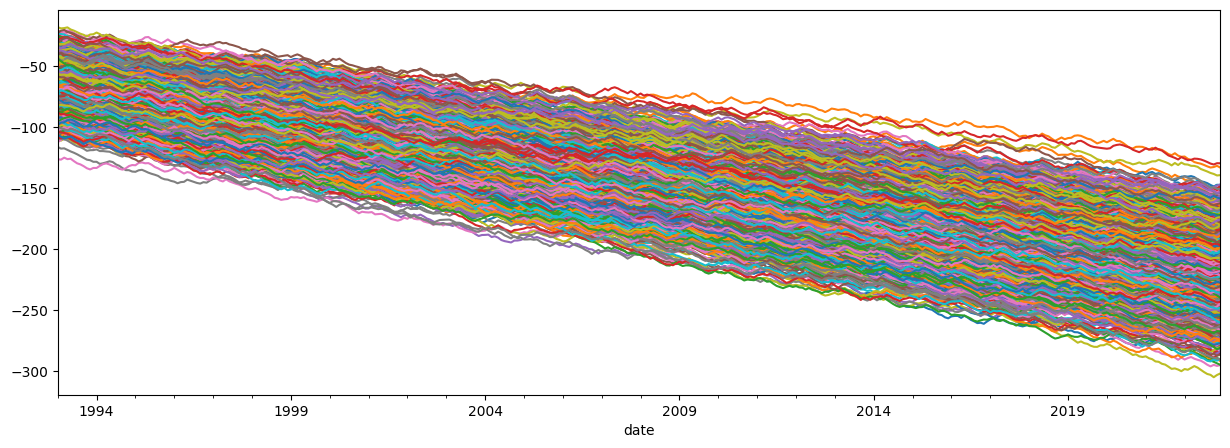

In [8]:
#First glance of the data
gdf_pivot_1.plot(figsize=(15,5), legend=False, xlim=[datetime.date(1993, 1, 1), datetime.date(2022, 12, 31)])
nb_sites_input = gdf_pivot_1.shape[1]
print("The number of observation points available is", nb_sites_input)

## 3. Data filtering
This step consists in removing observation wells from the analysis, for instance if they are incomplete. There are two options:
1. Removing time series if at least one value is missing
2. Removing time series if the percentage of missing values is larger than 70%

In [9]:
# DATA SELECTION
# This step consists in removing observation wells from the analysis, for instance if they are incomplete. 

# gdf_1 = gdf_pivot_1.copy().dropna(axis=1) saved formula to remove all time series if at least one value is missing

# Removing time series if the percentage of missing values is larger than some percentage
perc_months_missing = 0.92

gdf_1 = gdf_pivot_1.copy()
    
max_number_of_monthly_nas = perc_months_missing*gdf_1.shape[0]
gdf_1 = gdf_1.loc[:, (gdf_1.isnull().sum(axis=0) <= max_number_of_monthly_nas)]

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

# Removing time series if data are missing for more than 1 year
gdf_1_year = gdf_1.resample('1y').mean()
gdf_1_year.index.name = "date"
print(gdf_1_year)

nb_years_missing = 3

col_to_drop = [i for i in gdf_1_year.columns if gdf_1_year[i].isnull().sum() > nb_years_missing]
print()
print(col_to_drop)
gdf_1.drop(col_to_drop, inplace = True, axis=1)

nb_sites = gdf_1.shape[1]
print("The number of observation points selected is", nb_sites) 

#gdf_1.plot(figsize=(15,5), legend=None, xlim=[datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

The number of observation points selected is 3200
site            Site_1     Site_10    Site_100   Site_1000   Site_1001  \
date                                                                     
1993-12-31  -52.783333  -63.866667  -67.254167  -55.955833  -99.802500   
1994-12-31  -63.087500  -72.150833  -70.860833  -63.957500 -109.219167   
1995-12-31  -65.265000  -80.540000  -77.865833  -71.313333 -115.186667   
1996-12-31  -71.541667  -82.323333  -82.916667  -74.508333 -117.246667   
1997-12-31  -73.913333  -85.907500  -89.061667  -77.362500 -120.545000   
1998-12-31  -77.405833  -90.805833  -91.508333  -76.699167 -126.162500   
1999-12-31  -83.317500  -95.060000  -98.585833  -82.450833 -126.834167   
2000-12-31  -88.694167 -102.242500 -102.098333  -86.559167 -132.360000   
2001-12-31  -88.686667 -108.932500 -109.332500  -84.055000 -139.913333   
2002-12-31  -89.790000 -114.009167 -119.068333  -90.109167 -147.253333   
2003-12-31  -87.670833 -119.751667 -124.611667  -87.674167 -15

In [10]:
#Final dataset to work further in the evaluation
gdf_1

site,Site_1,Site_10,Site_100,Site_1000,Site_1001,Site_1002,Site_1003,Site_1004,Site_1005,Site_1006,...,Site_990,Site_991,Site_992,Site_993,Site_994,Site_995,Site_996,Site_997,Site_998,Site_999
date,,,,,,,,,,,,,,,,,,,,,
1993-01-31,-50.72,-60.63,-63.84,-53.58,-95.63,-71.91,-51.79,-90.03,-33.31,-63.45,...,-98.33,-67.49,-44.09,-76.26,-53.55,-75.80,-68.38,-75.93,-82.35,-71.70
1993-02-28,-51.74,-59.96,-64.25,-52.75,-96.23,-70.08,-52.76,-91.82,-32.86,-65.14,...,-96.47,-66.84,-45.98,-74.97,-55.46,-74.11,-70.06,-76.92,-81.85,-69.78
1993-03-31,-49.88,-60.44,-65.61,-53.11,-95.89,-70.75,-52.53,-92.78,-31.26,-64.39,...,-96.26,-68.39,-47.92,-74.59,-55.31,-73.66,-68.56,-76.46,-82.44,-70.68
1993-04-30,-48.77,-60.98,-66.69,-54.93,-97.66,-72.54,-52.80,-92.68,-30.09,-65.95,...,-94.51,-68.43,-49.48,-72.92,-55.68,-73.42,-67.71,-76.98,-82.55,-71.93
1993-05-31,-49.38,-61.72,-65.14,-53.96,-95.77,-74.24,-53.27,-93.64,-30.81,-66.07,...,-93.76,-68.10,-49.45,-72.02,-54.12,-74.14,-69.33,-78.75,-82.96,-72.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-222.71,-231.81,-218.25,-164.30,-251.91,-224.26,-191.59,-243.45,-188.77,-217.43,...,-228.33,-196.66,-216.05,-208.30,-178.06,-230.56,-218.61,-224.00,-207.31,-246.54
2022-09-30,-223.21,-233.72,-218.87,-166.27,-253.89,-224.82,-192.65,-244.20,-189.97,-218.82,...,-229.13,-197.95,-216.58,-209.05,-179.67,-231.94,-219.35,-225.01,-208.12,-247.58
2022-10-31,-224.10,-235.65,-220.50,-166.43,-254.95,-223.71,-191.57,-244.64,-188.55,-217.24,...,-227.75,-199.89,-215.30,-208.05,-178.22,-232.60,-219.37,-224.85,-207.44,-248.24


## 4. Calculate aquifer-average trend
See https://www.w3schools.com/python/matplotlib_subplot.asp

In [11]:
# dataframe with site / date / level
gdf_melt = gdf_1.copy() #dataframe from step 3
gdf_melt = gdf_melt.unstack().reset_index(name='level')
gdf_melt.set_index('site', inplace=True)
gdf_melt

,date,level
site,,
Site_1,1993-01-31,-50.72
Site_1,1993-02-28,-51.74
Site_1,1993-03-31,-49.88
Site_1,1993-04-30,-48.77
Site_1,1993-05-31,-49.38
...,...,...
Site_999,2022-08-31,-246.54
Site_999,2022-09-30,-247.58
Site_999,2022-10-31,-248.24


In [12]:
#OBTAIN MEAN WATER LEVEL PER SITE TO THEN SUBTRACT FROM WATER LEVELS - ANOMALY 
waterlevel_means = gdf_melt.reset_index().groupby('site', as_index=False)['level'].mean()
waterlevel_means.set_index('site', inplace=True)
waterlevel_means

,level
site,
Site_1,-131.460028
Site_10,-147.127528
Site_100,-144.105056
Site_1000,-107.522917
Site_1001,-173.312778
...,...
Site_995,-151.438889
Site_996,-147.582833
Site_997,-146.845611


In [13]:
# ASSIGN MEAN WATER LEVEL TO EACH DATA ROW
gdf_melt['mean_level'] = gdf_melt.index.map(waterlevel_means['level'])
gdf_melt

,date,level,mean_level
site,,,
Site_1,1993-01-31,-50.72,-131.460028
Site_1,1993-02-28,-51.74,-131.460028
Site_1,1993-03-31,-49.88,-131.460028
Site_1,1993-04-30,-48.77,-131.460028
Site_1,1993-05-31,-49.38,-131.460028
...,...,...,...
Site_999,2022-08-31,-246.54,-149.403083
Site_999,2022-09-30,-247.58,-149.403083
Site_999,2022-10-31,-248.24,-149.403083


In [14]:
# Calculate normalized water level "norm_level"
gdf_melt['norm_level'] = gdf_melt['level'] - gdf_melt['mean_level']
gdf_melt 

,date,level,mean_level,norm_level
site,,,,
Site_1,1993-01-31,-50.72,-131.460028,80.740028
Site_1,1993-02-28,-51.74,-131.460028,79.720028
Site_1,1993-03-31,-49.88,-131.460028,81.580028
Site_1,1993-04-30,-48.77,-131.460028,82.690028
Site_1,1993-05-31,-49.38,-131.460028,82.080028
...,...,...,...,...
Site_999,2022-08-31,-246.54,-149.403083,-97.136917
Site_999,2022-09-30,-247.58,-149.403083,-98.176917
Site_999,2022-10-31,-248.24,-149.403083,-98.836917


          date  norm_level
0   1993-01-31   74.833777
1   1993-02-28   74.829737
2   1993-03-31   74.837905
3   1993-04-30   74.839002
4   1993-05-31   74.850496
..         ...         ...
355 2022-08-31  -74.293366
356 2022-09-30  -75.534463
357 2022-10-31  -75.533288
358 2022-11-30  -75.506045
359 2022-12-31  -75.543841

[360 rows x 2 columns]


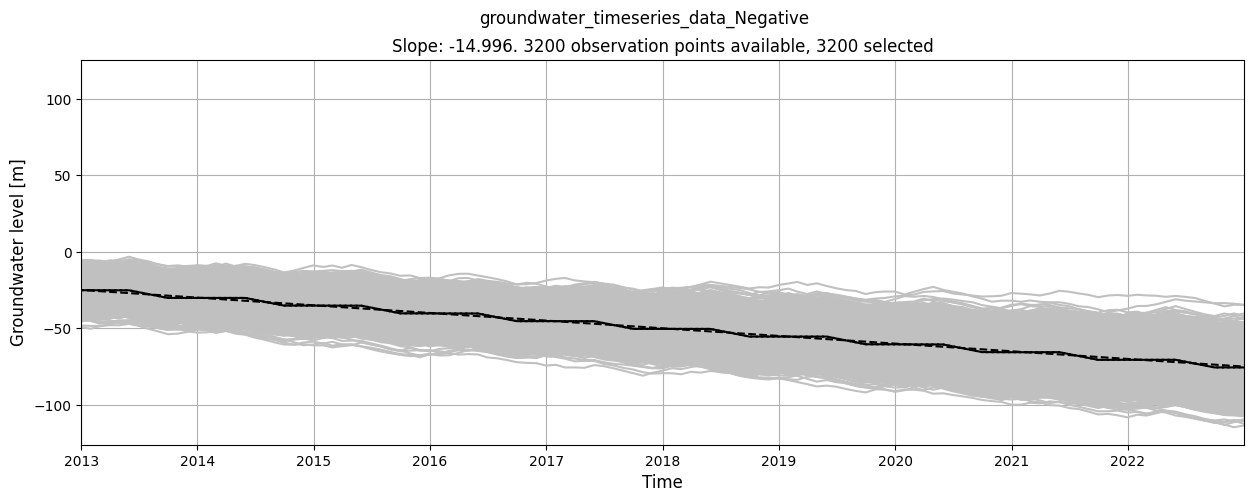

In [15]:
# aquifer-averaged data
final_df1 = gdf_melt[['date', 'norm_level']].groupby('date', as_index=False).mean()
print(final_df1)
final_df1.to_csv('debug.csv', index=False)

# linear trend
final_df1.loc[:, "date"] = pd.to_datetime(final_df1.loc[:, "date"], format="%d-%b-%y")
y_values = final_df1.loc[:, "norm_level"]
x_values = np.linspace(0, 1, len(final_df1.loc[:, "norm_level"]))
    
#cleaning NaN
idx = np.isfinite(x_values) & np.isfinite(y_values)
slope,b = np.polyfit(x_values[idx], y_values[idx], 1)
        
linear_fit = x_values*slope + b

fig, ax = plt.subplots(figsize=(15,5))

gdf_pivot = gdf_melt.pivot_table(index='date',columns='site',values='norm_level')    
plt.plot(gdf_pivot, color='#C0C0C0')     # all the monitoring curves

final_df2=final_df1.dropna()
plt.plot(final_df2.loc[:, "date"], final_df2.loc[:, "norm_level"],color='black', linestyle="dotted") # the composite hydrograph
plt.plot(final_df1.loc[:, "date"], final_df1.loc[:, "norm_level"],color='black') # the composite hydrograph

plt.plot(final_df1.loc[:, "date"], linear_fit, color='#000000', linestyle='dashed') # the linear regression

# axes
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Groundwater level [m]', fontsize = 12)
ax.grid()
plt.xlim([datetime.date(2013, 1, 1), datetime.date(2022, 12, 31)])

# title
plt.title("Slope: {}. {} observation points available, {} selected".format(round(slope/10, 3), nb_sites_input, nb_sites)) 
   # the slope is calculated over 0 --> 1, it has to be 2013.01.01 --> 2022.12.31 (10 years)
plt.suptitle(filename[:-4])

# save chart as an image
fig.savefig(filename[:-4] + ".jpg", bbox_inches='tight')

plt.show()

# UPDATE THE LIST OF OUTPUTS
list_aquifers.append((filename[:-4], round(slope, 3), nb_sites_input, nb_sites))

In [16]:
#final_df1.reset_index(inplace=True)
year_df = final_df1
print(year_df)
year_df.set_index('date', inplace=True)
year_df = year_df.resample('Y').mean()
year_df.dropna()
year_df['percent_rank'] = year_df.loc[:,'norm_level'].rank(pct=True)
print(year_df)
percentile = year_df.iloc[-1]['percent_rank']
percentile_year = year_df.index[-1]
print("percentile: {}\nyear: {}".format(percentile, percentile_year))

          date  norm_level
0   1993-01-31   74.833777
1   1993-02-28   74.829737
2   1993-03-31   74.837905
3   1993-04-30   74.839002
4   1993-05-31   74.850496
..         ...         ...
355 2022-08-31  -74.293366
356 2022-09-30  -75.534463
357 2022-10-31  -75.533288
358 2022-11-30  -75.506045
359 2022-12-31  -75.543841

[360 rows x 2 columns]
            norm_level  percent_rank
date                                
1993-12-31   72.543979      1.000000
1994-12-31   67.527300      0.966667
1995-12-31   62.514006      0.933333
1996-12-31   57.599817      0.900000
1997-12-31   52.599797      0.866667
1998-12-31   47.609453      0.833333
1999-12-31   42.715476      0.800000
2000-12-31   37.682988      0.766667
2001-12-31   32.568165      0.733333
2002-12-31   27.530573      0.700000
2003-12-31   22.501839      0.666667
2004-12-31   17.444738      0.633333
2005-12-31   12.411042      0.600000
2006-12-31    7.405149      0.566667
2007-12-31    2.460265      0.533333
2008-12-31   -2.459431 

## 6. Update summary file

We save the information about this aquifer in the summary file

In [77]:
# Create the pandas DataFrame
output_df = pd.DataFrame(list_aquifers, columns=['aquifer', 'slope', 'nb_sites_input', 'nb_sites'])
output_df.to_csv('Overview.csv', index=False)